# Corto 1 - ModSim
- Diego Cordova 20212
- Gabriel Vicente 20498

In [1]:
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson


## Task 1

Suponga que usted está trabajando en la industria relacionada con meteorología, por lo cual le interesa saber la probabilidad de que haya N huracanes este año. Se sabe que la frecuencia histórica de huracanes es 7 por año, en otras palabras, el número promedio de huracanes por año es de 7.

1. ¿Es este un escenario que se pueda modelar como una variable aleatoria de Poisson? ¿Por qué?
<br/>
<span style="color:skyblue">
R// Si se puede modelar como una variable aleatoria de poisson en dónde la probabilidad del que sucede un evento determinado, en este caso el huracán, está dada por el intervalo de tiempo que se analiza. En este caso la variabla lambda es 7.
</span>


2. Considere que usted analizará hasta un máximo de 16 huracanes este año. Grafique PMF (probability mass function) de estos eventos

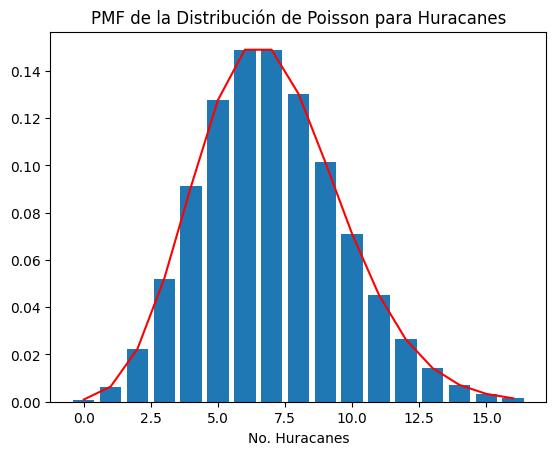

In [2]:

num_huracanes = range(0, 17)
pmf = poisson.pmf(num_huracanes, mu=7)

plt.bar(num_huracanes, pmf)
plt.plot(pmf, color='red')
plt.xlabel('No. Huracanes')
plt.title('PMF de la Distribución de Poisson para Huracanes')
plt.show()

3. Considere que usted analizará hasta un máximo de 16 huracanes este año. Grafique CDF (cumulative distribution function) de estos eventos

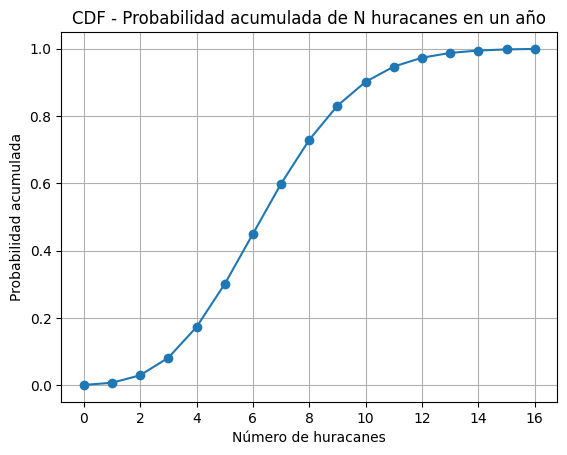

In [3]:

def poisson_prob(N, lam):
    return (math.exp(-lam) * lam**N) / math.factorial(N)

def poisson_cdf(N, lam):
    cdf_vals = [poisson_prob(n, lam) for n in range(N + 1)]
    cdf = [sum(cdf_vals[:i+1]) for i in range(N + 1)]
    return cdf

lambda_huracanes = 7
max_huracanes = 16

N_values = list(range(max_huracanes + 1))
cdf = poisson_cdf(max_huracanes, lambda_huracanes)

plt.plot(N_values, cdf, marker='o')
plt.xlabel('Número de huracanes')
plt.ylabel('Probabilidad acumulada')
plt.title('CDF - Probabilidad acumulada de N huracanes en un año')
plt.grid()
plt.show()


4. ¿Qué conclusiones puede sacar al observar las gráficas de los ejercicios anteriores?

<br/>
<span style="color:skyblue">
R// De la gráfia PMF se puede observar que lo más probable es que se produzcan entre 6 a 7.5 huracanoes por año, esto dado a su función de mása de probabilidad, lo cual tiene sentido dado las declaraciones iniciales. Respecto a CDF podemos observar que la probabilidad de que ocurra un huracán más a comparación del año anterior aumenta logaritmicamente, dando como resultado que pasen más de 16 huracánes en ese periodo de tiempo.

</span>

## Task 2
Usted es un analista de simulación encargado de modelar la llegada de clientes a una tienda minorista. Desea
simular la cantidad de clientes que llegan por hora utilizando dos métodos diferentes: el método de transformación
inversa y el método de rechazo.

### Task 2.1
Defina la distribución de probabilidad objetivo para las llegadas de clientes en función de los datos históricos.
Supongamos que ha recopilado datos y descubrió que la cantidad de clientes que llegan por hora sigue una
distribución de Poisson con un promedio de 10 clientes por hora (λ = 10).

1. Implemente el método de transformación inversa para generar muestras aleatorias a partir de la distribución de Poisson.
2. Genere una muestra aleatoria de tamaño 1000 que represente el número de clientes que llegan en una hora.
3. Trace un histograma de la muestra generada y compárelo con el PMF teórico de la distribución de Poisson.
4. Calcule la media y la varianza de la muestra generada y compárelas con los valores teóricos.

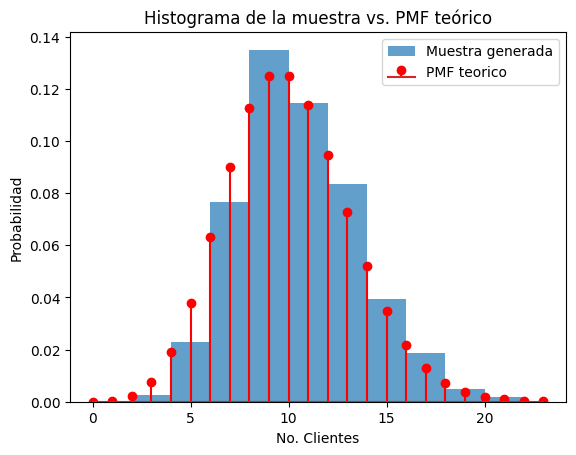

,Description,Value
0,Media de la muestra,10.012000
1,Varianza de la muestra,9.393856
2,Media de teórica,10.000000
3,Varianza teórica,10.000000


In [41]:
from math import e
horas = range(0, 24)

# Datos de muestreo
def muestreo_inversa(lamb, size):
    muestra = []

    for i in range(size):
        U = np.random.uniform(0, 1)
        i = 0
        p = e**(-lamb)
        F = p
        
        while U >= F:
            p = (lamb * p)/(i + 1)
            F = F + p
            i = i + 1

        muestra.append(i)

    return muestra

muestra_inversa = muestreo_inversa(lamb=10, size=1000)
media_inversa = np.mean(muestra_inversa)
varianza_inversa = np.var(muestra_inversa)

# Datos teoricos
pmf = poisson.pmf(horas, mu=10)
media_teorica = poisson.mean(mu=10)
varianza_teorica = poisson.var(mu=10)

# Graficos
plt.hist(muestra_inversa, density=True, alpha=0.7, label='Muestra generada')
plt.stem(pmf, 'r', label='PMF teorico')
plt.xlabel('No. Clientes')
plt.ylabel('Probabilidad')
plt.title('Histograma de la muestra vs. PMF teórico')
plt.legend()
plt.show()

# Media y Varianza
data = {
    "Description": ["Media de la muestra", "Varianza de la muestra", "Media de teórica", "Varianza teórica"],
    "Value": [media_inversa, varianza_inversa, media_teorica, varianza_teorica]
}

display(pd.DataFrame(data))


### Task 2.2
Defina una distribución de propuesta que sea más fácil de muestrear y que cubra el soporte de la distribución de
Poisson de destino. Por ejemplo, puede elegir una distribución uniforme o geométrica.

1. Calcule la constante C para acotar la relación entre el PMF objetivo y el PMF propuesto en todo el soporte de la distribución de Poisson.


In [42]:

"""Se eligio la distribución Geométrica"""

def C_constant(lmbd):
    p = 1 / (lmbd + 1)
    max_ratio = max((math.exp(-lmbd) * (lmbd ** k) / math.factorial(k)) / (((1 - p) ** (k - 1)) * p) for k in range(1, 101))
    return max_ratio

lambdaV = 10
C = C_constant(lambdaV)
print("Constante C_constant:", C)


Constante C_constant: 3.2450321183453124


2. Implemente el método de rechazo para generar muestras aleatorias a partir de la distribución de Poisson.

In [43]:
def metodo_rechazo(n_samples, lmbd):
    p = 1 / (lmbd + 1)
    muestras_obtenidas = []
    
    while len(muestras_obtenidas) < n_samples:
        Y = random.randint(1, 100) 
        U = random.uniform(0, 1)
        if U <= (math.exp(-lmbd) * (lmbd ** Y) / (C * (((1 - p) ** (Y - 1)) * p))):
            muestras_obtenidas.append(Y)
    
    return muestras_obtenidas


3. Genere una muestra aleatoria de tamaño 1000 que represente el número de clientes que llegan en una hora utilizando el método de rechazo.


In [44]:
lambdaV = 10  
cantidad_muestrasA = 1000 
samples = metodo_rechazo(cantidad_muestrasA, lambdaV)
print("Muestra aleatoria:", samples)

Muestra aleatoria: [34, 32, 26, 5, 76, 84, 18, 50, 19, 37, 58, 28, 86, 74, 18, 75, 33, 15, 34, 86, 85, 37, 39, 86, 20, 89, 88, 57, 67, 48, 46, 23, 10, 12, 12, 78, 57, 74, 48, 15, 93, 9, 10, 59, 27, 89, 56, 54, 19, 38, 93, 85, 70, 43, 27, 67, 42, 7, 90, 39, 82, 40, 46, 10, 82, 13, 86, 63, 66, 92, 3, 28, 15, 38, 23, 90, 66, 25, 62, 5, 5, 50, 11, 66, 82, 17, 74, 85, 83, 38, 65, 96, 57, 27, 44, 97, 55, 4, 40, 68, 47, 90, 30, 53, 61, 65, 75, 58, 17, 58, 58, 51, 57, 44, 20, 44, 21, 23, 67, 82, 74, 11, 13, 91, 20, 83, 96, 73, 11, 38, 75, 100, 83, 41, 71, 17, 48, 49, 62, 39, 47, 55, 45, 81, 29, 84, 61, 94, 70, 41, 18, 39, 6, 72, 63, 93, 53, 29, 82, 28, 23, 100, 93, 77, 96, 36, 10, 56, 62, 70, 36, 44, 96, 76, 16, 36, 66, 63, 95, 14, 12, 19, 32, 20, 16, 60, 6, 84, 15, 41, 7, 90, 4, 85, 50, 84, 33, 87, 91, 82, 56, 96, 60, 82, 82, 85, 85, 37, 64, 32, 22, 22, 35, 84, 76, 79, 78, 83, 77, 45, 69, 76, 50, 89, 51, 69, 60, 90, 15, 70, 87, 13, 100, 4, 91, 68, 75, 81, 99, 98, 88, 33, 93, 65, 77, 90, 67, 3

4. Trace un histograma de la muestra generada y compárelo con el PMF teórico de la distribución de Poisson.

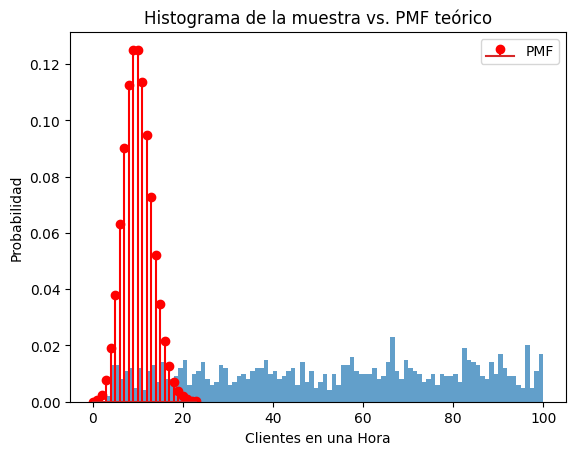

In [45]:

plt.hist(samples, bins=range(min(samples), max(samples) + 1), density=True, alpha=0.7)
x = range(min(samples), max(samples) + 1)
pmf_theoretical = [(math.exp(-lambdaV) * (lambdaV ** k) / math.factorial(k)) for k in x]
plt.stem(pmf, 'r', label='PMF')
plt.xlabel('Clientes en una Hora')
plt.ylabel('Probabilidad')
plt.title('Histograma de la muestra vs. PMF teórico')
plt.legend()
plt.show()


5. Calcule la media y la varianza de la muestra generada y compárelas con los valores teóricos.

In [18]:

data = {
    "Description": ["Media de la muestra", "Varianza de la muestra", "Media de teórica", "Varianza teórica"],
    "Value": [np.mean(samples), np.var(samples), lambdaV, lambdaV]
}

display(pd.DataFrame(data))

,Description,Value
0,Media de la muestra,51.5500
1,Varianza de la muestra,776.2155
2,Media de teórica,10.0000
3,Varianza teórica,10.0000


**Responda:**
1. Compare los resultados de los dos métodos. ¿Qué método proporciona un mejor ajuste a la distribución de
Poisson objetivo?

<span style="color:skyblue">
R// Se puede argumentar que la que tiene un mejor ajuste corresponde a la distribucion con el método de transformacion inversa, ya que cómo se puede apreciar en su gráfica PMF esta es fiel a los valores proporcionados
</span>

<br/>


2. Discuta las ventajas y desventajas de cada método en términos de eficiencia y precisión.

<span style="color:skyblue">
R// Se puede argumentar que el método del rechazo es simple y fácil de implementar, además de que es flexible entre samples, el problema es su precisión, cómo se puede ver en el histograma del inciso anterior comparado con el del 2.1. Mientras que el método de transformación inversa presentó una mejor adaptabilidad a la muestra, dejando cómo evidencia las gráficas por lo que su prescisión no está a discusión, pero es limitado respecto a que distribuciones aplicarselo.
</span>

<br/>


3. Considere diferentes escenarios, como cambiar la tasa de llegada promedio (λ) o usar diferentes
distribuciones de propuestas. ¿Cómo funcionan los métodos en estos escenarios?

<span style="color:skyblue">
R// En estos casos, el muestreo depende también de la distribución propuesta. En este caso se puede mejorar la presicion realizando una buena elección de distribución propuesta. Sin embargo, la transformación a la inversa sigue siendo mejor en terminos de desempeño que la transformación inversa debido a que aprovecha la inversa de la cdf de la distribución original para lograr una probabilidad más precisa.
</span>